# Data Preparation  -  Lecturer(s):  David McQuaid  

## CA1 Brief, Data and Upload Area

### Importing Data
##### Import critical libraries to process attachment data. I will also upload additional libraries as needed to improve and understand the code or analysis.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

##### Now I am making the code to import the csv into python

In [4]:
datos = pd.read_csv("aps_failure_set (1).csv", na_values="na")
datos.head(-1)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,neg,32,0.0,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,258.0,98.0,224.0,166.0,36.0,486.0,0.0,0.0,0.0,0.0
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0


##### I start counting the number of null values (missing values) in a DataFrame from the Pandas library.

In [5]:
datos.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        class  aa_000  ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0      False   False    True   False   False   False   False   False   False   
1      False   False    True   False    True   False   False   False   False   
2      False   False    True   False   False   False   False   False   False   
3      False   False   False   False   False   False   False   False   False   
4      False   False    True   False   False   False   False   False   False   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995  False   False    True   False   False   False   False   False   False   
59996  False   False    True   False   False   False   False   False   False   
59997  False   False   False   False   False   False   False   False   False   
59998  False   False    True   False   False   False   False   False   False   
59999  False   False    True   False   False   False   Fal

##### Detect columns in a dataset where the percentage of missing values is 75% or higher relative to the total number of entries.

In [6]:
drop_columns = []

for column in datos.columns:
    percentage = datos[column].isnull().sum() / len(datos)
    
    if(percentage >= 0.75):
        drop_columns = drop_columns + [column]
        
drop_columns

['ab_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']

##### Describe el código Python que se utiliza para organizar los datos adecuadamente antes de usarlos en un modelo de aprendizaje automático, como un modelo que busca clasificar datos en categorías específicas.

In [7]:
dummies = pd.get_dummies(datos["class"])
dummies.drop("pos",axis=1, inplace=True)

features_columns = datos.columns[1:]

features = datos[features_columns]
target = dummies

##### Code to see what the data structure is like, represented in rows and columns

In [8]:
features.shape

(60000, 170)

##### fill the null values (missing values) in a Data called "features" with the mean of each corresponding column.

In [9]:
features.fillna(features.mean(), inplace=True)
features.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


##### I replace the values equal to 0 in the Data called "features" with the average of each column. This technique is applied when 0 values represent missing or invalid data.

##### The goal is to give a better guess for the data that's not there, while still keeping the results accurate and good.

In [ ]:
features.replace(0, features.mean(), inplace=True)

##### Fill in the missing data in a group of information called "features". They are filled using the average of each respective column.

In [ ]:
features.fillna(features.mean(), inplace=True)

# Principal Component Analysis (PCA) & Early Data Analysis (Visualization)

## Data visualization and dimensionality reduction

In [12]:
pca = PCA()
pca.fit(features)

PCA()

##### Creating a graph that shows the cumulative explained variance as a function of the number of principal components

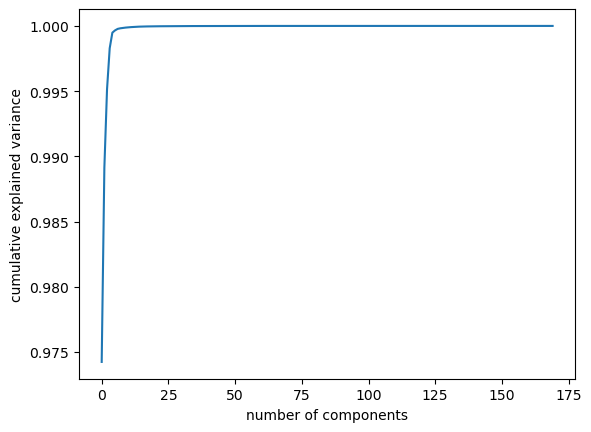

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 